In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import(LinearRegression, 
                                 Lasso, 
                                 Ridge,
                                 ElasticNet)
from sklearn.ensemble import(RandomForestRegressor, 
                            GradientBoostingRegressor, 
                            AdaBoostRegressor)
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
df=pd.read_csv('insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
df.shape

(1338, 7)

In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [7]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
num_col=numeric_cols = df.select_dtypes(include=['int64','float64']).columns

In [10]:
num_col

Index(['age', 'bmi', 'children', 'expenses'], dtype='object')

In [11]:
cat_col=df.select_dtypes(include=['object']).columns

In [12]:
cat_col

Index(['sex', 'smoker', 'region'], dtype='object')

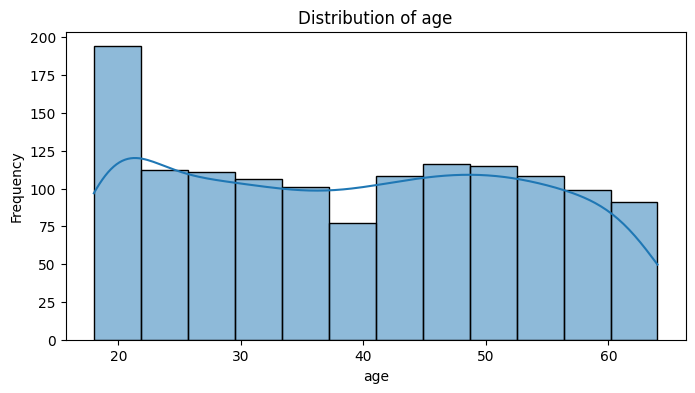

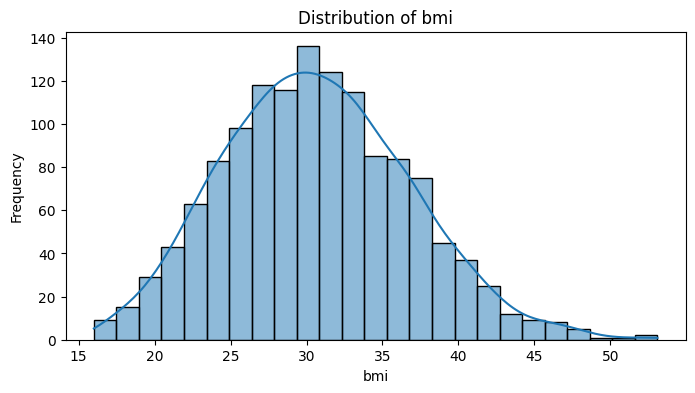

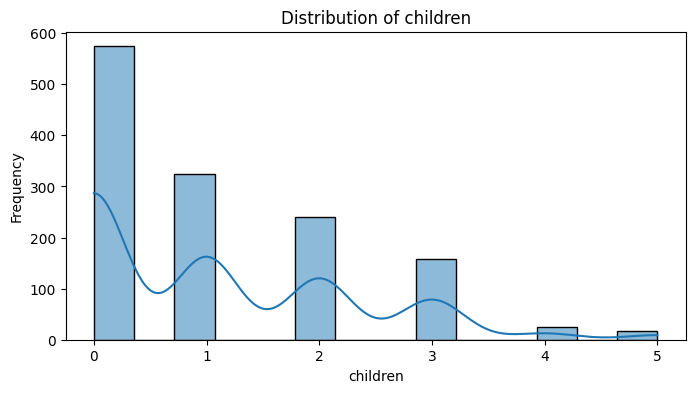

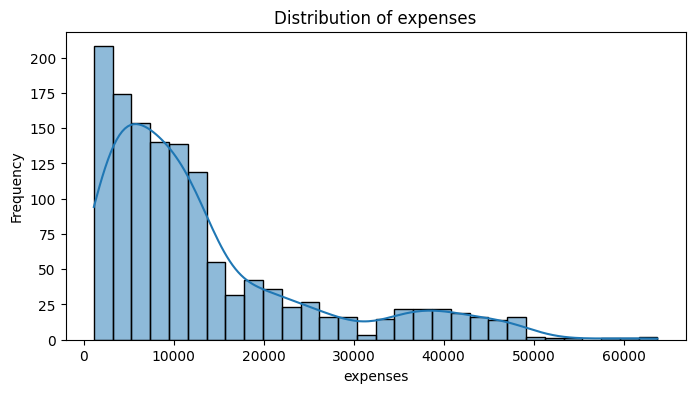

In [19]:
for col in num_col:
    plt.figure(figsize=(8,4))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

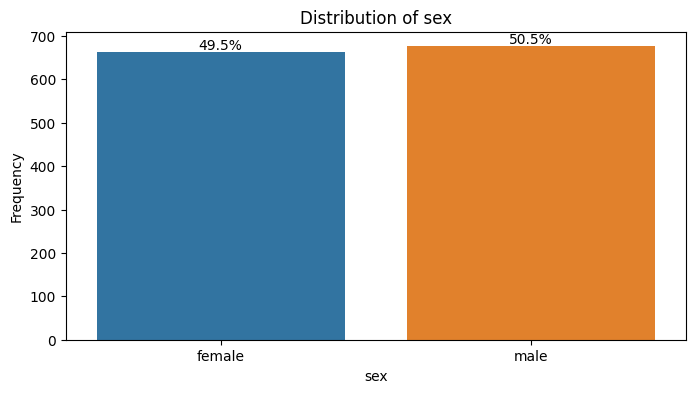

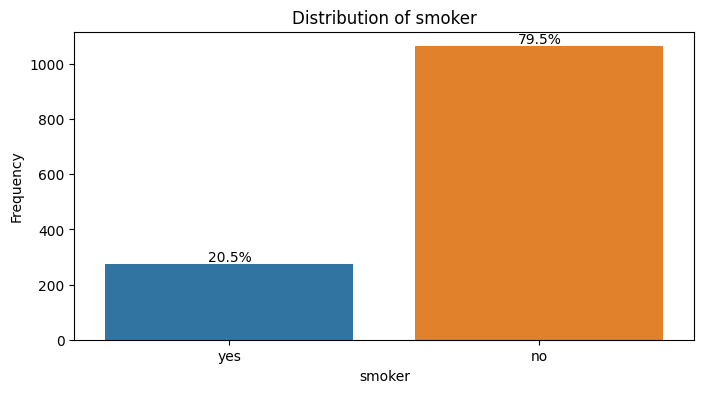

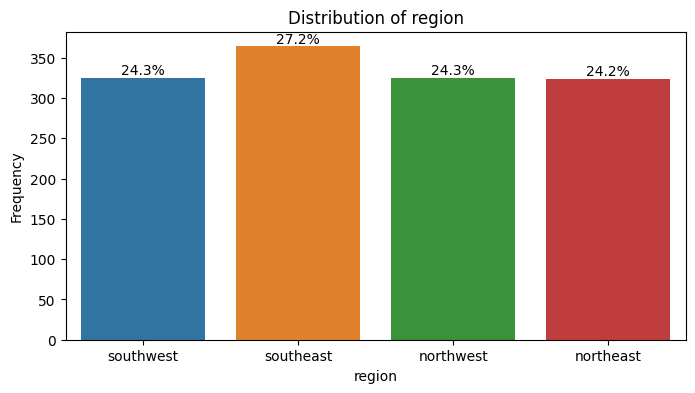

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'cat_col' is a list of categorical columns
cat_col = ['sex', 'smoker', 'region']

# Create count plots with percentages for each categorical column
for col in cat_col:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(data=df, x=col)
    
    # Calculate total count and percentages
    total = len(df)
    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total) * 100
        ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


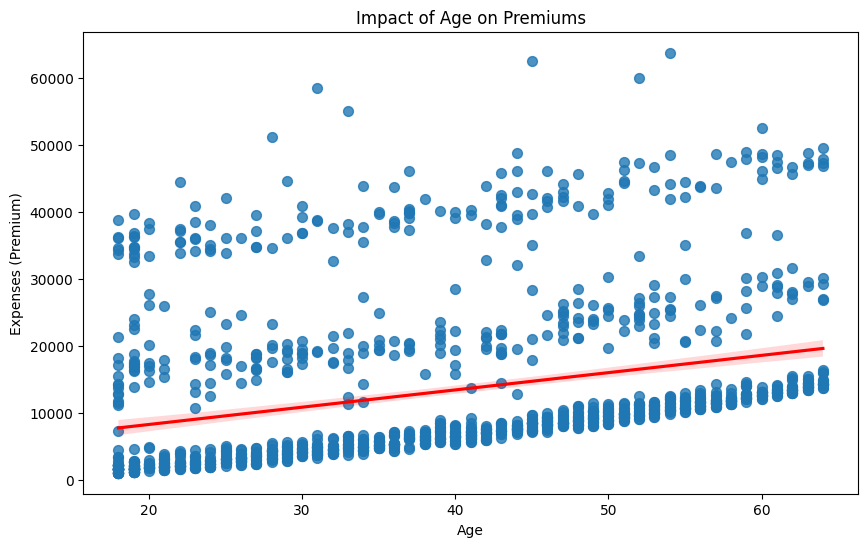

Correlation between Age and Premiums: 0.30


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='age', y='expenses', scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Impact of Age on Premiums')
plt.xlabel('Age')
plt.ylabel('Expenses (Premium)')
plt.show()

# Calculate correlation
corr_age_expenses = df['age'].corr(df['expenses'])
print(f'Correlation between Age and Premiums: {corr_age_expenses:.2f}')


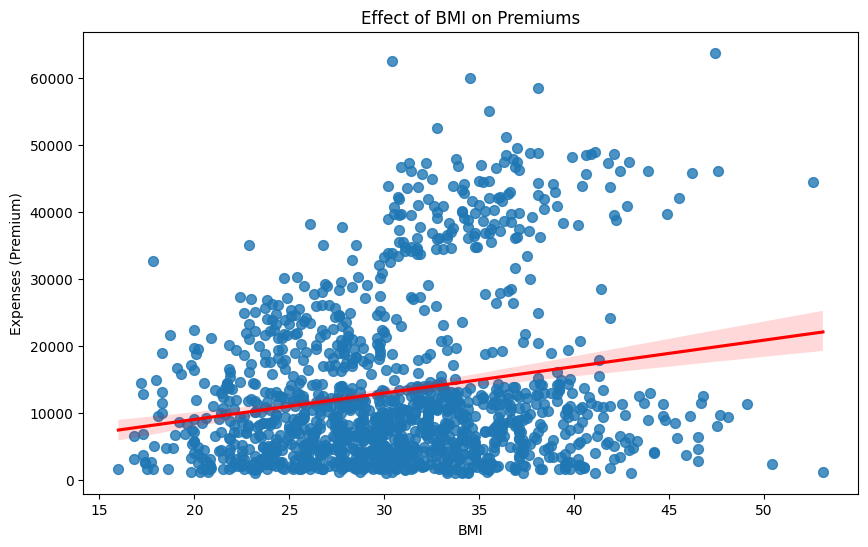

Correlation between BMI and Premiums: 0.20


In [24]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='bmi', y='expenses', scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Effect of BMI on Premiums')
plt.xlabel('BMI')
plt.ylabel('Expenses (Premium)')
plt.show()

# Calculate correlation
corr_bmi_expenses = df['bmi'].corr(df['expenses'])
print(f'Correlation between BMI and Premiums: {corr_bmi_expenses:.2f}')


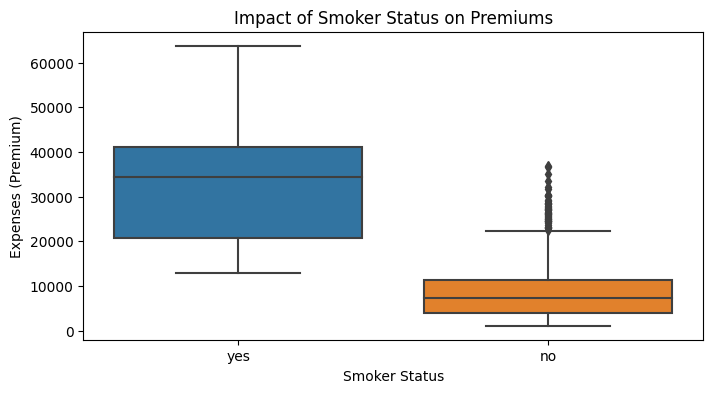

Mean Premiums by Smoker Status:
smoker
no      8434.268449
yes    32050.231971
Name: expenses, dtype: float64


In [26]:
# Box plot
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='smoker', y='expenses')
plt.title('Impact of Smoker Status on Premiums')
plt.xlabel('Smoker Status')
plt.ylabel('Expenses (Premium)')
plt.show()

# Calculate mean expenses by smoker status
mean_expenses_by_smoker = df.groupby('smoker')['expenses'].mean()
print('Mean Premiums by Smoker Status:')
print(mean_expenses_by_smoker)


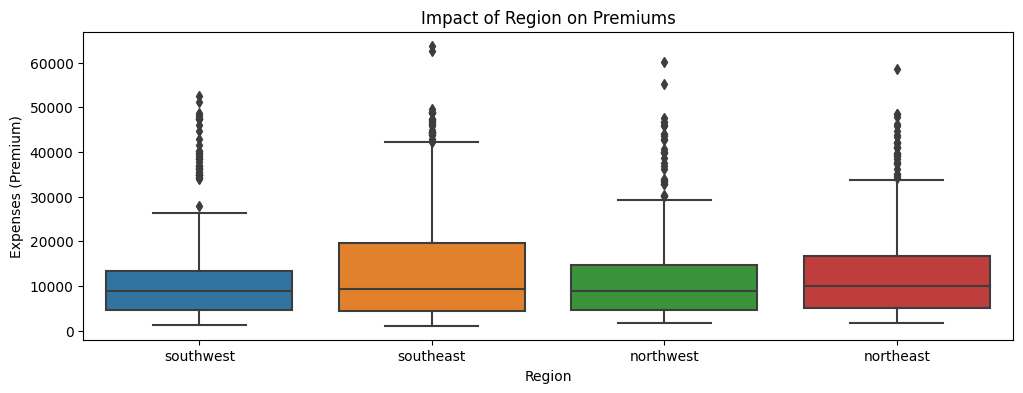

Mean Premiums by Region:
region
northeast    13406.384691
northwest    12417.575169
southeast    14735.411538
southwest    12346.937908
Name: expenses, dtype: float64


In [28]:
# Box plot
plt.figure(figsize=(12, 4))
sns.boxplot(data=df, x='region', y='expenses')
plt.title('Impact of Region on Premiums')
plt.xlabel('Region')
plt.ylabel('Expenses (Premium)')
plt.show()

# Calculate mean expenses by region
mean_expenses_by_region = df.groupby('region')['expenses'].mean()
print('Mean Premiums by Region:')
print(mean_expenses_by_region)


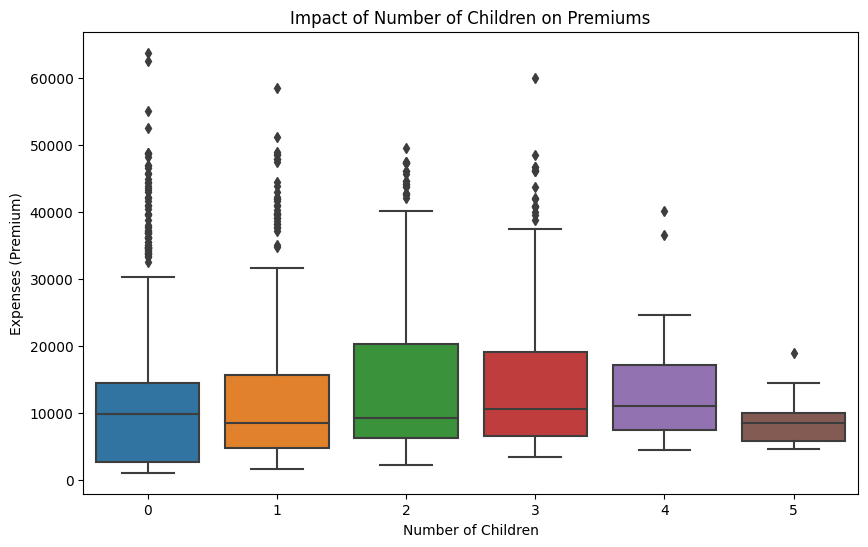

Mean Premiums by Number of Children:
children
0    12365.975767
1    12731.171821
2    15073.564000
3    15355.318535
4    13850.656800
5     8786.035556
Name: expenses, dtype: float64


In [29]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='children', y='expenses')
plt.title('Impact of Number of Children on Premiums')
plt.xlabel('Number of Children')
plt.ylabel('Expenses (Premium)')
plt.show()

# Calculate mean expenses by number of children
mean_expenses_by_children = df.groupby('children')['expenses'].mean()
print('Mean Premiums by Number of Children:')
print(mean_expenses_by_children)


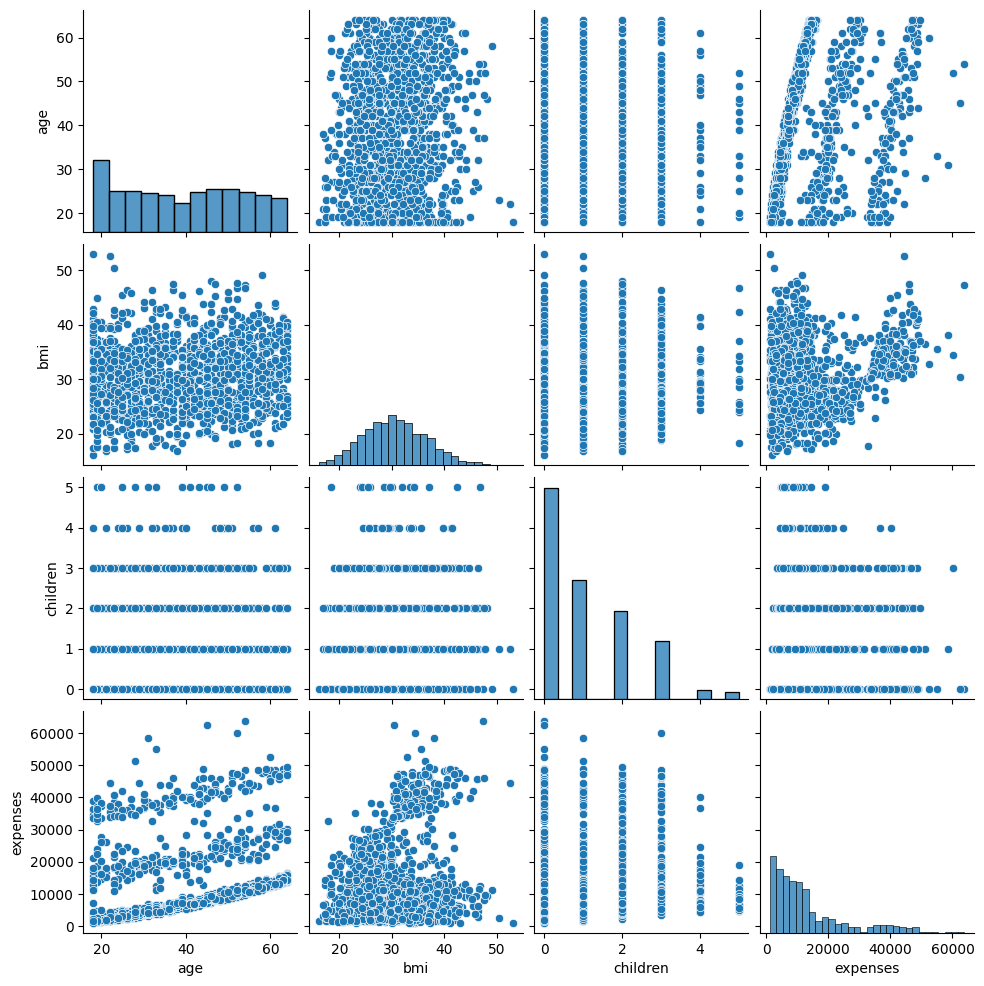

In [30]:
sns.pairplot(df)

<Axes: >

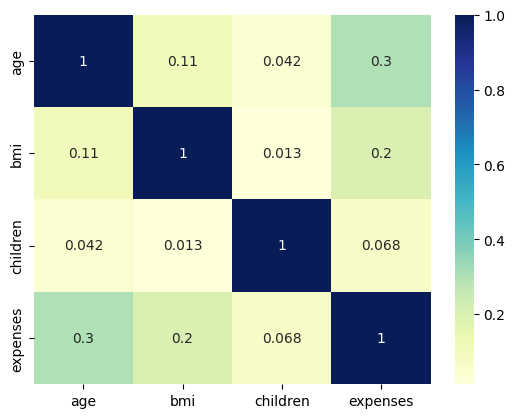

In [33]:
sns.heatmap(df[num_col].corr(),annot=True,cmap='YlGnBu')

In [34]:
df.shape

(1338, 7)

In [35]:
#Data preparation


In [129]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [130]:
df_num=df.select_dtypes(include=['int64','float64'])

In [131]:
# scaler=MinMaxScaler()
# numeric=scaler.fit_transform(df_num)

      age     sex   bmi  children smoker     region  expenses
0      19  female  27.9         0    yes  southwest  16884.92
1      18    male  33.8         1     no  southeast   1725.55
2      28    male  33.0         3     no  southeast   4449.46
3      33    male  22.7         0     no  northwest  21984.47
4      32    male  28.9         0     no  northwest   3866.86
...   ...     ...   ...       ...    ...        ...       ...
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36

[1338 rows x 7 columns]


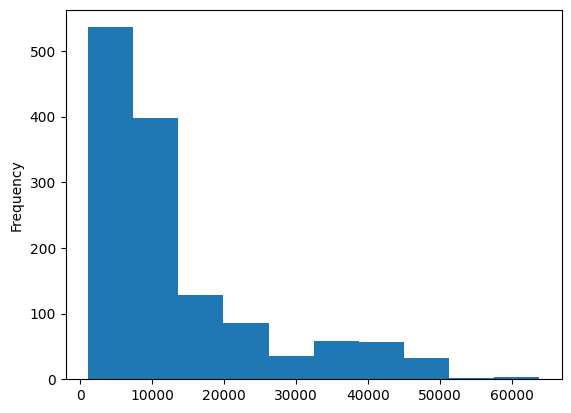

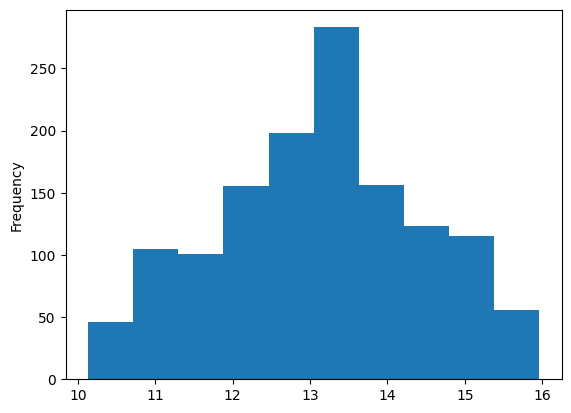

In [132]:
# import numpy as np
# df_num['log_expenses'] = np.log2(df_num['expenses'] +1)

# plt.figure(1)

# df_num['expenses'].plot(kind = 'hist')

# plt.figure(2)
# df_num['log_expenses'].plot(kind = 'hist')

# print(df)
# df_num = df_num.drop(['expenses'], axis=1)

In [133]:
# df_numeric=pd.DataFrame(numeric,columns=df_num.columns)

In [134]:
df_cat=df.select_dtypes(include=['object'])

In [135]:
df_cat.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [136]:

onehotEnc = OneHotEncoder(sparse=False, dtype=int)

# Fit and transform the categorical data
df_cat_encoded = onehotEnc.fit_transform(df_cat)

# Get the feature names for the one-hot encoded columns
encoded_columns = onehotEnc.get_feature_names_out(df_cat.columns)

# Create a DataFrame with the encoded data and the appropriate column names
df_cat_encoded = pd.DataFrame(df_cat_encoded, columns=encoded_columns, dtype=int)

# Verify the result
print(df_cat_encoded.head())

   sex_female  sex_male  smoker_no  smoker_yes  region_northeast  \
0           1         0          0           1                 0   
1           0         1          1           0                 0   
2           0         1          1           0                 0   
3           0         1          1           0                 0   
4           0         1          1           0                 0   

   region_northwest  region_southeast  region_southwest  
0                 0                 0                 1  
1                 0                 1                 0  
2                 0                 1                 0  
3                 1                 0                 0  
4                 1                 0                 0  


c:\Users\madhu\pendrive\myfiles\Data science Pro\insurance premium prediction\env\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [137]:
df_combined=pd.concat([df_num,df_cat_encoded],axis=1)

In [138]:
df_combined.head()

,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0.320755,0.0,0.251611,1,0,0,1,0,0,0,1
1,0.000000,0.479784,0.2,0.009636,0,1,1,0,0,0,1,0
2,0.217391,0.458221,0.6,0.053115,0,1,1,0,0,0,1,0
3,0.326087,0.180593,0.0,0.333010,0,1,1,0,0,1,0,0
4,0.304348,0.347709,0.0,0.043816,0,1,1,0,0,1,0,0


<Axes: >

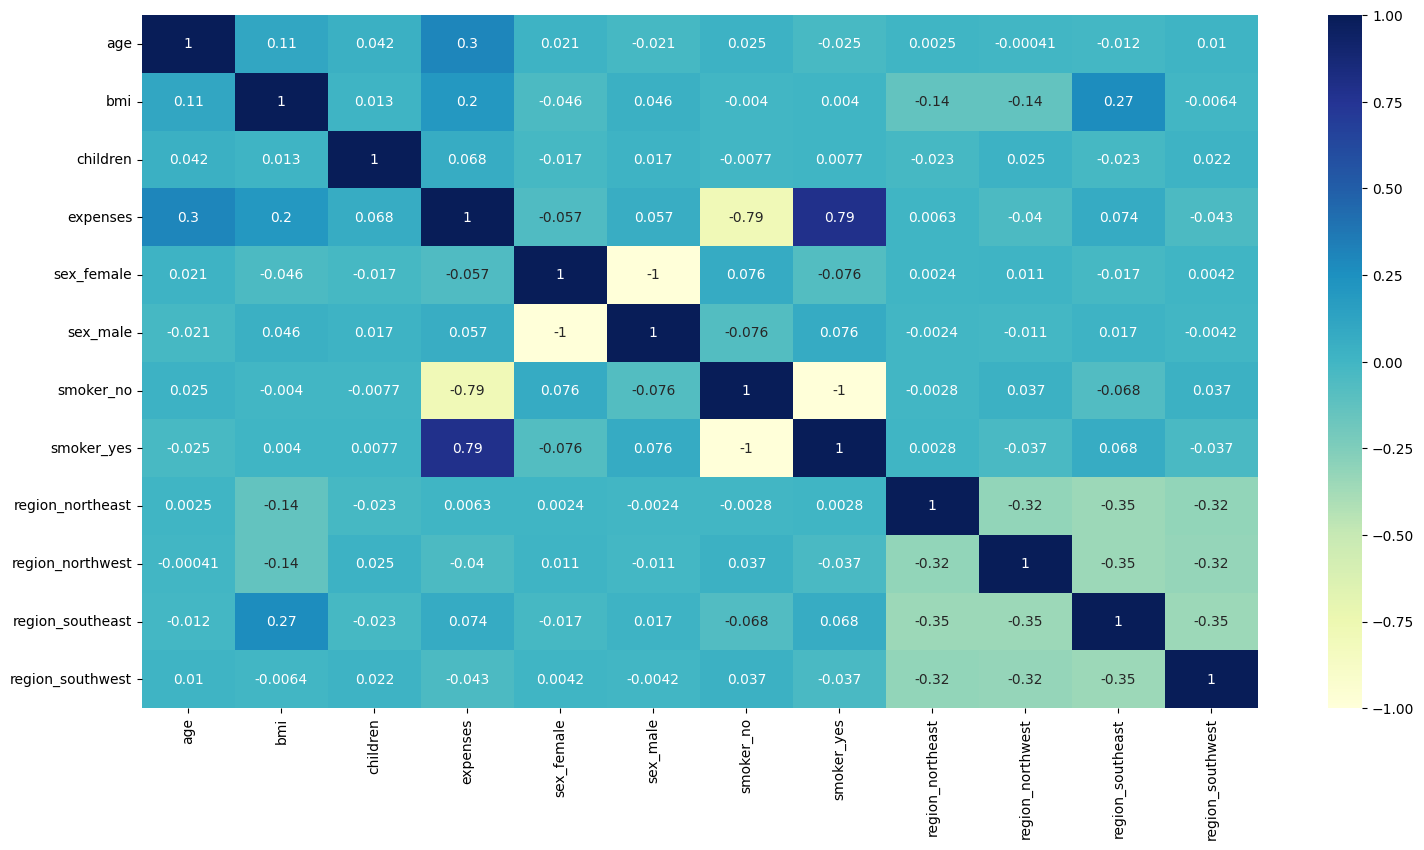

In [139]:
plt.figure(figsize=(18,9))
sns.heatmap(df_combined.corr(),annot=True,cmap='YlGnBu')

In [140]:
X=df_combined.drop(columns='expenses',axis=1)


In [141]:
y=df_combined['expenses']

In [142]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [184]:
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [185]:
models = {
    'linear':LinearRegression(),
    'Lasso':Lasso(alpha=1.0),
    'ridge':Ridge(),
    'random':RandomForestRegressor(random_state = 13),
    'xg':XGBRegressor(random_state = 42),
    'Gradient':GradientBoostingRegressor(random_state = 42),
    'knn': KNeighborsRegressor()
}

In [216]:
# function to get the evaluation metrics
def evaluation(x_train, x_test, y_train, y_test, models):
    results = {}
    for key,value in models.items():
        model = value.fit(x_train,y_train)
        y_predict_test = model.predict(x_test)
        y_pred_train = model.predict(x_train)
        
        r2_train = r2_score(y_true = y_train,
                            y_pred = y_pred_train)
        
        r2 = r2_score(y_true = y_test,
                      y_pred = y_predict_test)
        
        mse = mean_squared_error(y_true = y_test,
                                 y_pred = y_predict_test)
        mae = mean_absolute_error(y_true = y_test,
                                  y_pred = y_predict_test)
        results[key] = {
            'r2_score_train': r2_train,
            'r2_score_test': r2,
            'RMSE': np.sqrt(mse),
            'MAE': mae,
            'y_pred_test':y_predict_test,
            'y_pred_train':y_pred_train
        }
        print(key)
        print(f'r2_score_train : {r2_train}')
        print(f'r2_score : {r2}')
        print(f'RMSE : {np.sqrt(mse)}')
        print(f'MAE : {mae}')
        print("%%%%%%%%%%%")
    return results
        


In [220]:
results=evaluation(X_train_scaled, X_test_scaled, y_train, y_test, models)

linear
r2_score_train : 0.7417509671301924
r2_score : 0.7835726930039905
RMSE : 0.09252497321381492
MAE : 0.06674633102501945
%%%%%%%%%%%
Lasso
r2_score_train : 0.0
r2_score : -0.0009192482838715765
RMSE : 0.19897680854809363
MAE : 0.1531294345105385
%%%%%%%%%%%
ridge
r2_score_train : 0.7417033963611657
r2_score : 0.7833178954043558
RMSE : 0.09257942153366439
MAE : 0.06654847839336495
%%%%%%%%%%%
random
r2_score_train : 0.9752213549611334
r2_score : 0.8593142316623208
RMSE : 0.07459814421867934
MAE : 0.04105658241233683
%%%%%%%%%%%
xg
r2_score_train : 0.9943366559789919
r2_score : 0.8245670282072052
RMSE : 0.0833025988103089
MAE : 0.04617535206690089
%%%%%%%%%%%
Gradient
r2_score_train : 0.8996661979272013
r2_score : 0.879378609727551
RMSE : 0.06907407935110456
MAE : 0.03849243982775789
%%%%%%%%%%%
knn
r2_score_train : 0.8423228320095638
r2_score : 0.7857612494691275
RMSE : 0.0920559689640193
MAE : 0.05750327844011481
%%%%%%%%%%%


In [229]:
results['linear']['y_pred_test']

array([ 1.25380338e-01,  9.48082571e-02,  5.70470229e-01,  1.32761191e-01,
        4.12522775e-01,  1.55545413e-01, -1.52946304e-02,  2.51885958e-01,
       -4.64194000e-04,  1.61216471e-01,  4.30639509e-01,  1.31838728e-01,
        6.61346882e-02,  5.95570664e-01,  6.24534651e-01,  5.74035682e-01,
        2.25484191e-01,  5.55155025e-01,  1.27785652e-01,  4.84337760e-01,
        4.35205537e-02,  1.43802906e-01,  1.99337695e-02,  9.60563387e-02,
        1.62383502e-01,  1.89082631e-01,  2.13695446e-01,  8.04300987e-02,
        1.41120396e-01,  1.66197284e-02,  1.27616401e-01,  1.90631111e-01,
        5.50610060e-02,  3.67458474e-02,  5.32852863e-02,  1.90096287e-01,
        1.36923993e-02,  1.22768829e-01,  5.12971856e-01,  5.02205438e-01,
        4.45095614e-02,  5.14220766e-02,  2.07851857e-01,  1.64622243e-01,
        1.22417364e-01,  1.75177441e-01,  6.62540599e-02,  3.23813603e-02,
        5.48811324e-01,  1.28211494e-01,  2.34862910e-01,  1.96453581e-02,
        1.79380991e-01,  

In [202]:
feature_names=['age', 'bmi', 'children', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest']

X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)
feature_names = X_train_scaled.columns

In [203]:
ridge=models['ridge']
ridge_importance = np.abs(ridge.coef_)  # Take the absolute value of the coefficients
ridge_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': ridge_importance
}).sort_values(by='Importance', ascending=False)

In [206]:
random_forest=models['random']
rf_importance = random_forest.feature_importances_
rf_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_importance
}).sort_values(by='Importance', ascending=False)

print("\nRandom Forest Feature Importance:")
print(rf_importance_df)


Random Forest Feature Importance:
             Feature  Importance
6         smoker_yes    0.364300
5          smoker_no    0.241925
1                bmi    0.209219
0                age    0.137729
2           children    0.020058
7   region_northeast    0.006172
8   region_northwest    0.004860
9   region_southeast    0.004240
4           sex_male    0.004167
3         sex_female    0.004014
10  region_southwest    0.003316


In [207]:
xgboost=models['xg']
xgb_importance = xgboost.feature_importances_
xgb_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb_importance
}).sort_values(by='Importance', ascending=False)

print("\nXGBoost Feature Importance:")
print(xgb_importance_df)



XGBoost Feature Importance:
             Feature  Importance
5          smoker_no    0.919891
1                bmi    0.025670
0                age    0.018137
2           children    0.008206
8   region_northwest    0.006514
7   region_northeast    0.006225
9   region_southeast    0.005931
3         sex_female    0.005449
10  region_southwest    0.003976
4           sex_male    0.000000
6         smoker_yes    0.000000


In [204]:
def plot_feature_importance(importance_df, title):
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='skyblue')
    plt.gca().invert_yaxis()  # To display the most important feature at the top
    plt.title(title)
    plt.xlabel('Importance')
    plt.show()

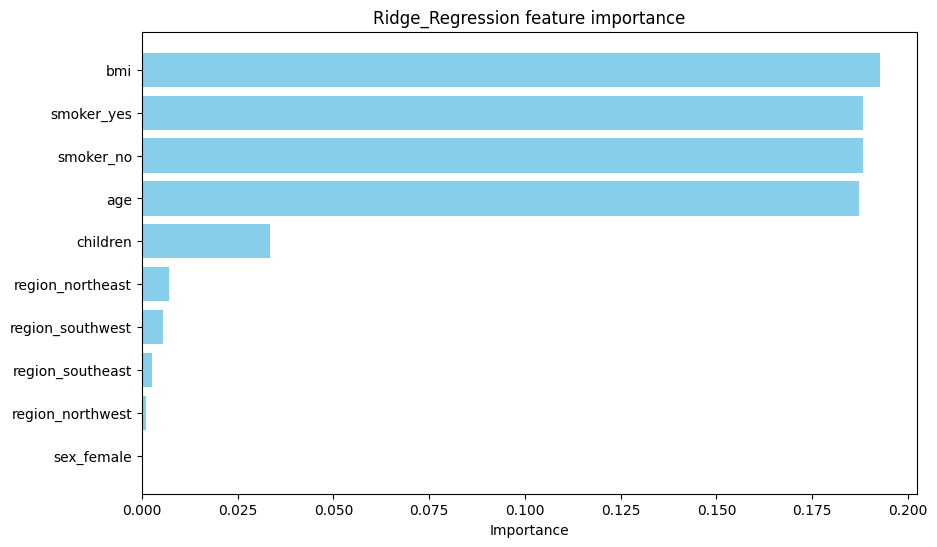

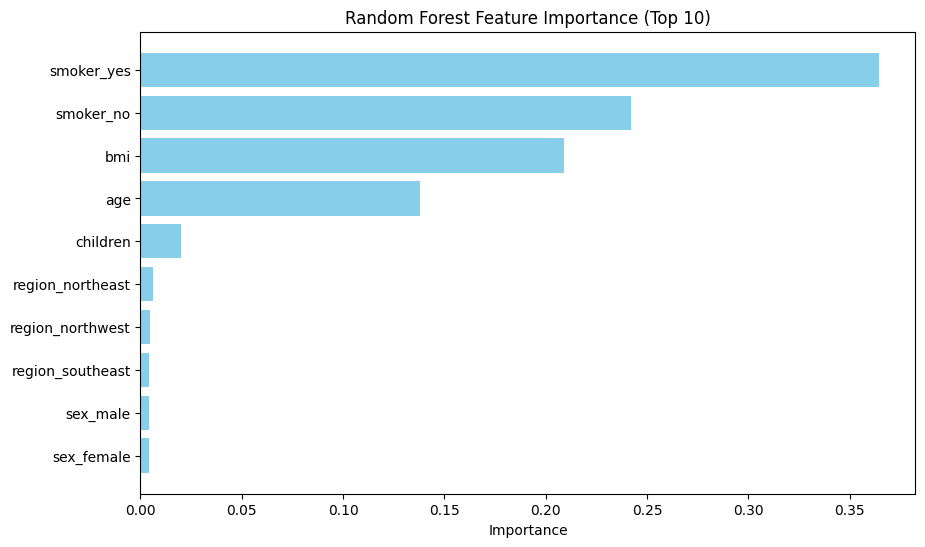

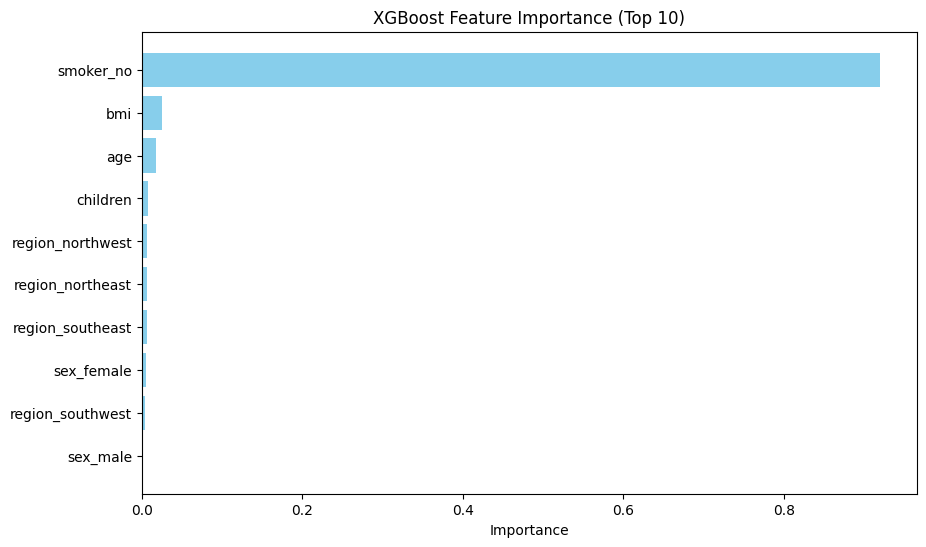

In [209]:
plot_feature_importance(ridge_importance_df,'Ridge_Regression feature importance')
plot_feature_importance(rf_importance_df, 'Random Forest Feature Importance (Top 10)')
plot_feature_importance(xgb_importance_df, 'XGBoost Feature Importance (Top 10)')

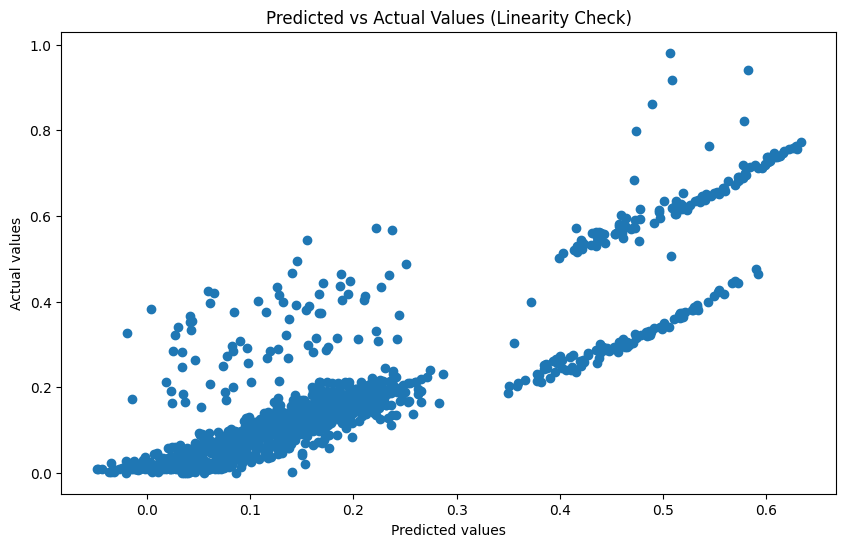

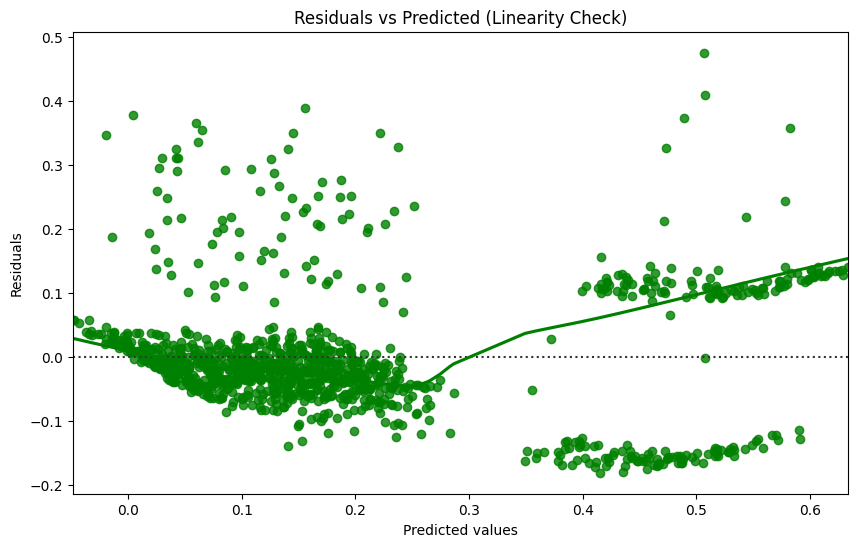

In [238]:
# Plot predicted vs actual values to check for linearity
plt.figure(figsize=(10, 6))
plt.scatter(results['linear']['y_pred_train'], y_train)
plt.title('Predicted vs Actual Values (Linearity Check)')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

# Residual plot (Residuals should have no pattern)
residuals = y_train- results['linear']['y_pred_train']
plt.figure(figsize=(10, 6))
sns.residplot(x=results['linear']['y_pred_train'], y=residuals, lowess=True, color="g")
plt.title('Residuals vs Predicted (Linearity Check)')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

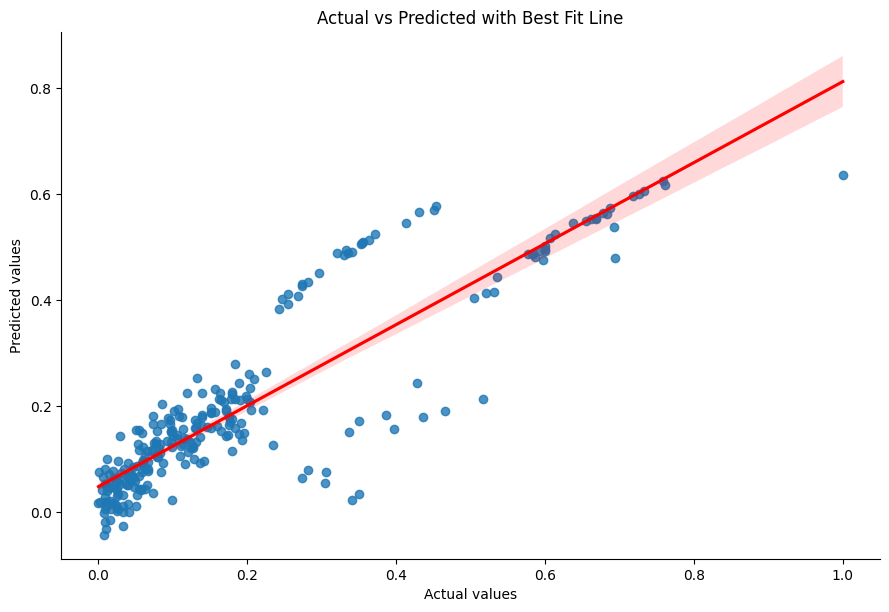

In [239]:
df_results = pd.DataFrame({
    'Predicted':results['linear']['y_pred_test'],  # Replace with your predicted values
    'Actual': y_test               # Replace with your actual target values
})

# Plotting the relplot (scatterplot) with the best fit line
sns.lmplot(x='Actual', y='Predicted', data=df_results, height=6, aspect=1.5, line_kws={"color": "red"})
plt.title('Actual vs Predicted with Best Fit Line')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

In [240]:
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

# Add a constant for statsmodels
X_train_sm = sm.add_constant(X_train_scaled)

# Fit the model using statsmodels for the Durbin-Watson test
model_sm = sm.OLS(y_train_scaled, X_train_sm).fit()

# Durbin-Watson test
dw = durbin_watson(model_sm.resid)
print(f'Durbin-Watson Test: {dw}')


Durbin-Watson Test: 2.0855176626793845


Interpretation: Values around 2 indicate no autocorrelation (good). Values close to 0 suggest positive autocorrelation, and values near 4 suggest negative autocorrelation.

In [241]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_scaled.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled.values, i) for i in range(X_train_scaled.shape[1])]

print(vif_data)


             Feature       VIF
0                age  1.023104
1                bmi  1.095046
2           children  1.005646
3         sex_female       inf
4           sex_male       inf
5          smoker_no       inf
6         smoker_yes       inf
7   region_northeast       inf
8   region_northwest       inf
9   region_southeast       inf
10  region_southwest       inf


c:\Users\madhu\pendrive\myfiles\Data science Pro\insurance premium prediction\env\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Interpretation: A VIF above 5 or 10 indicates high multicollinearity, which may affect the model's reliability.

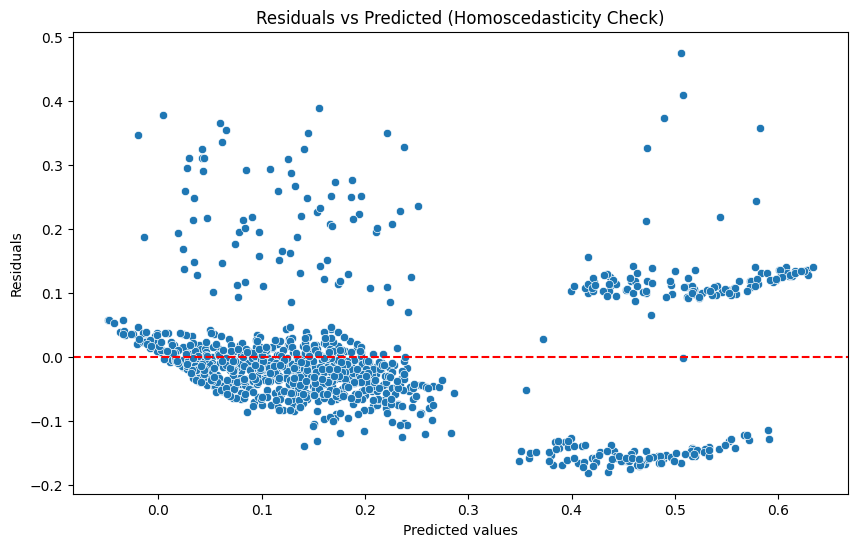

In [248]:
df_residuals = pd.DataFrame({
    'Predicted': results['linear']['y_pred_train'],  # Replace with your predicted values
    'Residuals': residuals      # Replace with your residual values
})

# Plotting the residuals vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Predicted', y='Residuals', data=df_residuals)
plt.title('Residuals vs Predicted (Homoscedasticity Check)')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at 0 for reference
plt.show()

In [249]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Perform the Breusch-Pagan test
bp_test = het_breuschpagan(model_sm.resid, model_sm.model.exog)

# bp_test[0] is the test statistic, and bp_test[1] is the p-value
print(f'Breusch-Pagan Test Statistic: {bp_test[0]}')
print(f'Breusch-Pagan Test p-value: {bp_test[1]}')


Breusch-Pagan Test Statistic: 93.20620574375474
Breusch-Pagan Test p-value: 3.913746396766372e-15


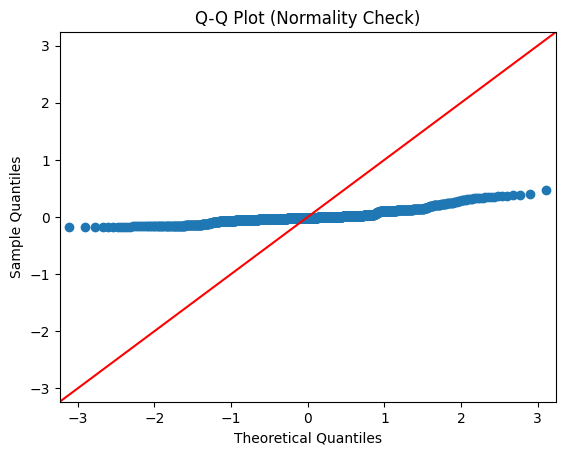

In [250]:
# Q-Q plot to check for normality of residuals
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot (Normality Check)')
plt.show()


In [251]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test
shapiro_test = shapiro(residuals)
print(f'Shapiro-Wilk Test Statistic: {shapiro_test[0]}')
print(f'Shapiro-Wilk Test p-value: {shapiro_test[1]}')


Shapiro-Wilk Test Statistic: 0.8944053649902344
Shapiro-Wilk Test p-value: 1.8582667869114635e-26
